# Lab 6.1 : Using Lime with Pytorch

In this tutorial we will show how to use Lime framework with Pytorch. We will use Lime to explain the prediction generated by one of the pretrained ImageNet models.

Let's start with importing our dependencies.

In [1]:
# Install LIME package
# On Google Colab
!pip install lime
# On your personal laptop with Anaconda
# conda install -c conda-forge lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=d16b16092fe132f15997d18986b5cf5377e45cce7cbac08a9e6792f505538447
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import torch.nn as nn
import numpy as np
import os, json

import torch
from torchvision import models, transforms
from torch.autograd import Variable
import torch.nn.functional as F

In [3]:
print(torch.__version__)

2.1.0+cu121


In [4]:
# Download the image and the class index
# You can alternatively use "wget"
!curl https://raw.githubusercontent.com/marcotcr/lime/master/doc/notebooks/data/imagenet_class_index.json --output imagenet_class_index.json

!curl https://raw.githubusercontent.com/EliSchwartz/imagenet-sample-images/master/n02085620_Chihuahua.JPEG --output dog.png

!ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35363  100 35363    0     0  71232      0 --:--:-- --:--:-- --:--:-- 71296
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  142k  100  142k    0     0   308k      0 --:--:-- --:--:-- --:--:--  308k
total 184
-rw-r--r-- 1 root root 146425 Jan 14 07:23 dog.png
-rw-r--r-- 1 root root  35363 Jan 14 07:23 imagenet_class_index.json
drwxr-xr-x 1 root root   4096 Jan 11 17:02 sample_data


In [5]:
# The following code loads json file. The output will have values of dict type.
file_name_imagenet_class = "imagenet_class_index.json"
with open(file_name_imagenet_class, 'r') as f:
    class_idx =  json.loads(f.read())

# Print the class names
for c in class_idx.values():
    print(c)


['n01440764', 'tench']
['n01443537', 'goldfish']
['n01484850', 'great_white_shark']
['n01491361', 'tiger_shark']
['n01494475', 'hammerhead']
['n01496331', 'electric_ray']
['n01498041', 'stingray']
['n01514668', 'cock']
['n01514859', 'hen']
['n01518878', 'ostrich']
['n01530575', 'brambling']
['n01531178', 'goldfinch']
['n01532829', 'house_finch']
['n01534433', 'junco']
['n01537544', 'indigo_bunting']
['n01558993', 'robin']
['n01560419', 'bulbul']
['n01580077', 'jay']
['n01582220', 'magpie']
['n01592084', 'chickadee']
['n01601694', 'water_ouzel']
['n01608432', 'kite']
['n01614925', 'bald_eagle']
['n01616318', 'vulture']
['n01622779', 'great_grey_owl']
['n01629819', 'European_fire_salamander']
['n01630670', 'common_newt']
['n01631663', 'eft']
['n01632458', 'spotted_salamander']
['n01632777', 'axolotl']
['n01641577', 'bullfrog']
['n01644373', 'tree_frog']
['n01644900', 'tailed_frog']
['n01664065', 'loggerhead']
['n01665541', 'leatherback_turtle']
['n01667114', 'mud_turtle']
['n01667778', '

### Question 1: What is ImageNet?

#### Answer:



### Question 2: What is Inception?

#### Answer:



Load our test image and see how it looks.

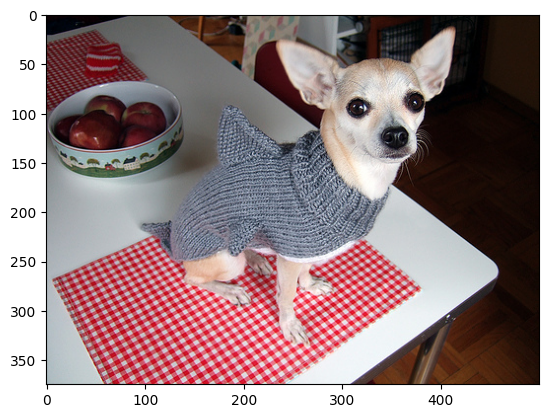

In [6]:
def get_image(path):
    with open(os.path.abspath(path), 'rb') as f:
        with Image.open(f) as img:
            return img.convert('RGB')

img = get_image('dog.png')
imgplot = plt.imshow(img)



We need to convert this image to Pytorch tensor and also apply whitening as used by our pretrained model.

In [7]:
# resize and take the center part of image to what our model expects
def get_input_transform():
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])
    transf = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize
    ])

    return transf

def get_input_tensors(img):
    transf = get_input_transform()
    # unsqeeze converts single image to batch of 1
    return transf(img).unsqueeze(0)

### Question 3: Explain what is a pretrained model?

#### Answer:


In [8]:
model = models.inception_v3(pretrained=True)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:01<00:00, 103MB/s] 


### Question 4: How do we call the approach of using pretrained model for a new task?

#### Answer:





### Question 5: Print the pretrained model. Analyse the architecture (How many layers? of which type? etc)

In [9]:
# fill in this cell
print(model)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

Load label texts for ImageNet predictions so we know what model is predicting

The file 'imagenet_class_index.json' contains the mapping of ImageNet class id to ImageNet class name. We get the class name of the predicted index.

In [10]:
idx2label, cls2label, cls2idx = [], {}, {}
with open(os.path.abspath(file_name_imagenet_class), 'r') as read_file:
    class_idx = json.load(read_file)
    # Create the list of class labels
    idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]
    cls2label = {class_idx[str(k)][0]: class_idx[str(k)][1] for k in range(len(class_idx))}
    cls2idx = {class_idx[str(k)][0]: k for k in range(len(class_idx))}

Get the predicition for our image.

In [11]:
img_t = get_input_tensors(img)
model.eval()
logits = model(img_t)
print(logits.sum())

tensor(-46.4650, grad_fn=<SumBackward0>)


### Question 6: What is the meaning of Top N accuracy?

#### Answer:



Predicitions we got are logits. Let's pass that through softmax to get probabilities and class labels for top 5 accuracy.

In [12]:
probs = F.softmax(logits, dim=1)
probs5 = probs.topk(5)
tuple((p,c, idx2label[c]) for p, c in zip(probs5[0][0].detach().numpy(), probs5[1][0].detach().numpy()))

((0.99955434, 151, 'Chihuahua'),
 (0.00043377848, 268, 'Mexican_hairless'),
 (1.2196966e-06, 195, 'Boston_bull'),
 (8.8801266e-07, 245, 'French_bulldog'),
 (7.9187686e-07, 259, 'Pomeranian'))

We are getting ready to use Lime. Lime produces the array of images from original input image by pertubation algorithm. So we need to provide two things: (1) original image as numpy array (2) classification function that would take array of purturbed images as input and produce the probabilities for each class for each image as output.

For Pytorch, first we need to define two separate transforms: (1) to take PIL image, resize and crop it (2) take resized, cropped image and apply whitening.

In [13]:
def get_pil_transform():
    transf = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224)
    ])

    return transf

def get_preprocess_transform():
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])
    transf = transforms.Compose([
        transforms.ToTensor(),
        normalize
    ])

    return transf

pill_transf = get_pil_transform()
preprocess_transform = get_preprocess_transform()

Now we are ready to define classification function that Lime needs. The input to this function is numpy array of images where each image is ndarray of shape (channel, height, width). The output is numpy array of shape (image index, classes) where each value in array should be probability for that image, class combination.

In [14]:
def batch_predict(images):
    model.eval()
    batch = torch.stack(tuple(preprocess_transform(i) for i in images), dim=0)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    batch = batch.to(device)

    logits = model(batch)
    probs = F.softmax(logits, dim=1)
    return probs.detach().cpu().numpy()

Let's test the function for the sample image.

In [15]:
test_pred = batch_predict([pill_transf(img)])
test_pred.squeeze().argmax()

151

Import lime and create explanation for this prediciton.

In [16]:
from lime import lime_image

In [17]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(np.array(pill_transf(img)),
                                         batch_predict, # classification function
                                         top_labels=5,
                                         num_samples=200) # number of images that will be sent to classification function

  0%|          | 0/200 [00:00<?, ?it/s]

Let's use mask on image and see the areas that are encouraging the top prediction.

In [18]:
from skimage.segmentation import mark_boundaries

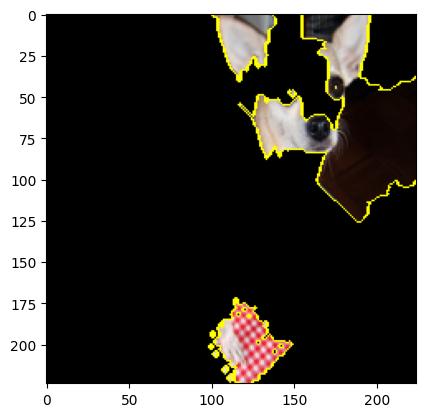

In [19]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],
                                            positive_only=True, negative_only=False,
                                            num_features=5,
                                            hide_rest=True)

img_boundry1 = mark_boundaries(temp/255.0, mask)
imgplot = plt.imshow(img_boundry1)

Let's turn on areas that contributes against the top prediction.

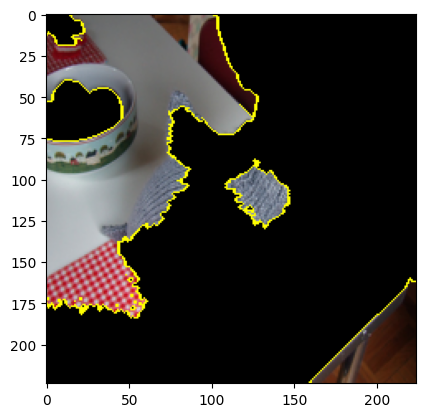

In [20]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],
                                            positive_only=False, negative_only=True,
                                            num_features=5,
                                            hide_rest=True)
img_boundry2 = mark_boundaries(temp/255.0, mask)
imgplot = plt.imshow(img_boundry2)

Let's turn on both positive and negative areas.

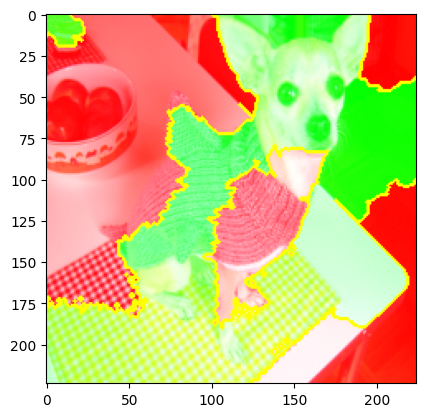

In [21]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],
                                            positive_only=False, negative_only=False,
                                            num_features=100,
                                            hide_rest=True)
img_boundry3 = mark_boundaries(temp/255.0, mask)
imgplot = plt.imshow(img_boundry3)